In [1]:
from Th_sampling_CR_update import generate_samples, visualize_samples_and_plot_pdf_cdf
import numpy as np
import pandas as pd
import datetime
import os

In [2]:
# Enter number of iteration 
itr = input("Iteration number: ")

# Enter number of samples
sample_size = int(input("Sample size: "))

Iteration number: 1
Sample size: 1300


In [3]:
# Get todays date
today = datetime.date.today()

In [4]:
# Generate Samples
gen_sample = generate_samples(sample_size)

C:\Users\prateekwahi\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [5]:
# Visualise the dataframe of samples
gen_sample

,Sample Number,Construction Year,orientation,compactness_ratio,WWR,Rc_Gr,Rc_Wl,Rc_Rf,U_Gz,U_Dr,Inf,Vent_sys,Temp_set
0,1,1992 after,90.0,1.015354,29.0,3.516031,2.214790,3.505104,2.463229,3.037537,1.115838,3.0,21.0
1,2,until 1945,0.0,1.858442,31.0,1.451131,0.369810,1.620055,2.682916,3.042459,1.921535,1.0,20.0
2,3,1992 after,180.0,1.630032,29.0,4.106602,3.684955,2.305246,2.680176,3.223157,0.897848,3.0,21.0
3,4,1976-1991,0.0,1.411543,31.0,2.298882,1.963910,3.219770,2.896433,2.655416,1.619801,1.0,19.0
4,5,1946-1975,90.0,1.339837,36.0,0.791084,1.921325,1.279116,3.875913,3.164528,2.965559,3.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,1992 after,90.0,1.395122,29.0,2.105027,2.228963,6.765320,1.851061,2.374605,1.066517,7.0,20.0
1296,1297,1946-1975,135.0,1.314427,36.0,2.942374,2.410997,1.652692,3.888668,3.169178,2.284567,1.0,21.0
1297,1298,1946-1975,135.0,1.901989,36.0,2.647939,2.506032,0.917718,3.735175,2.890603,2.091183,1.0,21.0
1298,1299,1946-1975,270.0,1.210591,36.0,4.230929,0.952511,0.501295,3.176973,2.684305,1.735555,1.0,19.0


## Saving the sampled files as input file and output file. 

In [6]:
# Define the base directory 
base_dir = r"C:\Users\prateekwahi\OneDrive - Delft University of Technology\PhD\7. Reports\3. Papers\3. paper 3\simulations\6.Terraced houses\10.3 updated_cr_logic_supplyT"

# Define file names 
inp_file_name = f"{today}_inputfile_itr_{itr}_size_{sample_size}.xlsx"
out_file_name = f"{today}_outputfile_itr_{itr}_size_{sample_size}.xlsx"

# Define direcotory names
hbjson_dir_name = f"{today}_hbjson_itr_{itr}_size_{sample_size}"
simpar_dir_name = f"{today}_simpar_itr_{itr}_size_{sample_size}"
sqlfiles_dir_name = f"{today}_sqlfiles_itr_{itr}_size_{sample_size}"

# Define file paths
input_dir_path = os.path.join(base_dir, "3. Input_excel", inp_file_name)
hbjson_dir_path = os.path.join(base_dir, "4. HBjson", hbjson_dir_name)
simpar_dir_path = os.path.join(base_dir, "5. Sim_par", simpar_dir_name)
sqlfiles_dir_path = os.path.join(base_dir, "6. Sql_files", sqlfiles_dir_name)
output_dir_path = os.path.join(base_dir, "7. Output_excel", out_file_name)

# Create directories
os.makedirs(hbjson_dir_path, exist_ok=True)
os.makedirs(simpar_dir_path, exist_ok=True)
os.makedirs(sqlfiles_dir_path, exist_ok=True)

# Save sampled dataframe to input file. 
gen_sample.to_excel(input_dir_path, index = False)

# Add new columns for the output file
gen_sample_out = gen_sample.copy()
gen_sample_out['Heating_demand'] = ''
gen_sample_out['Cold_hours'] = ''

# Save the new dataframe to output file. 
gen_sample_out.to_excel(output_dir_path, index = False)

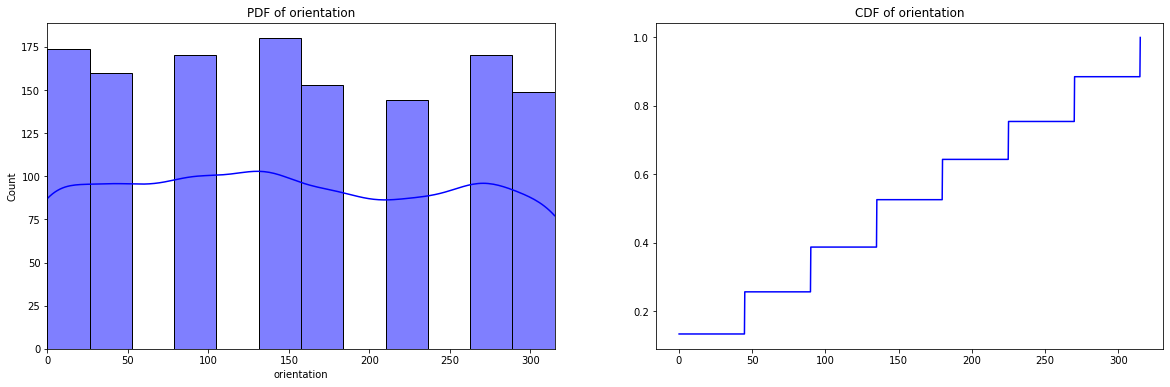

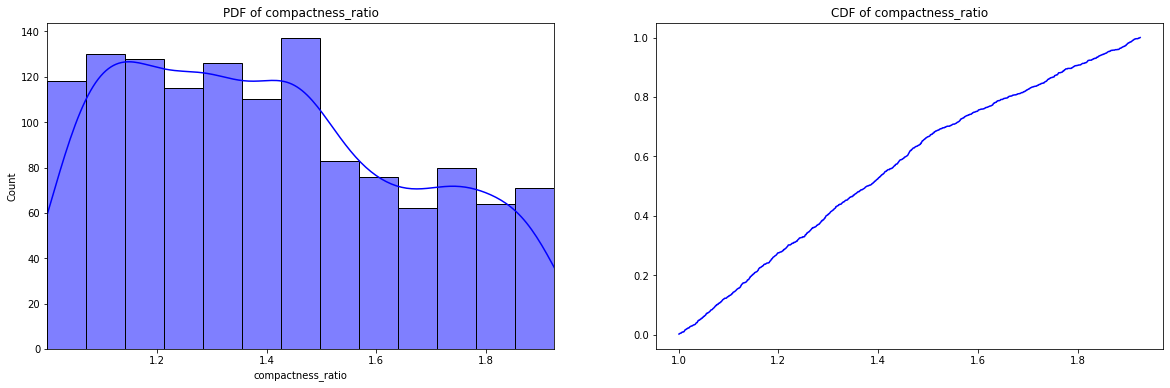

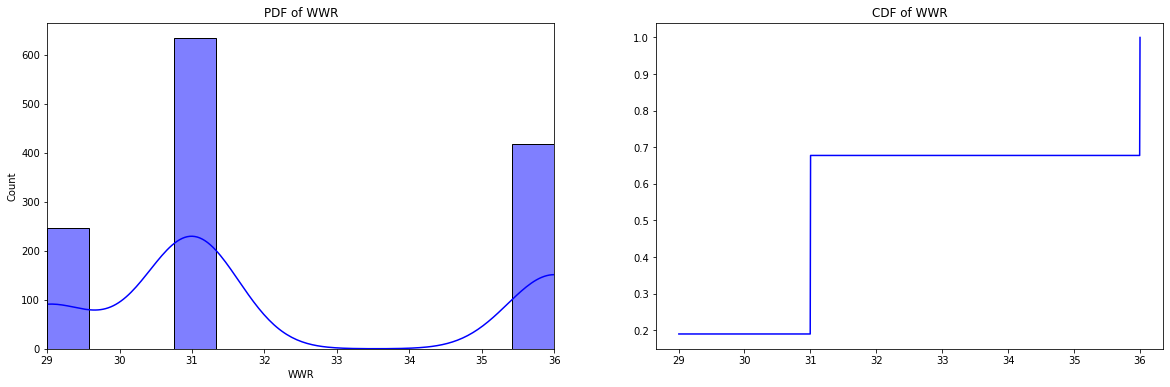

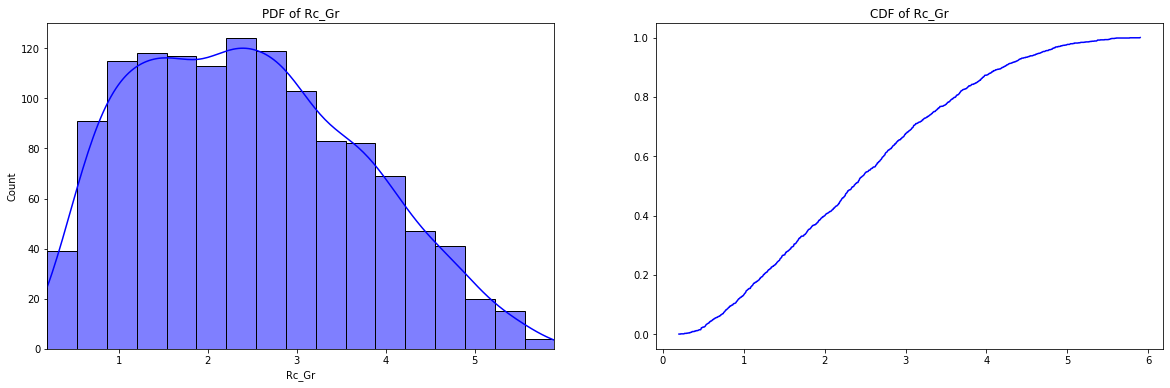

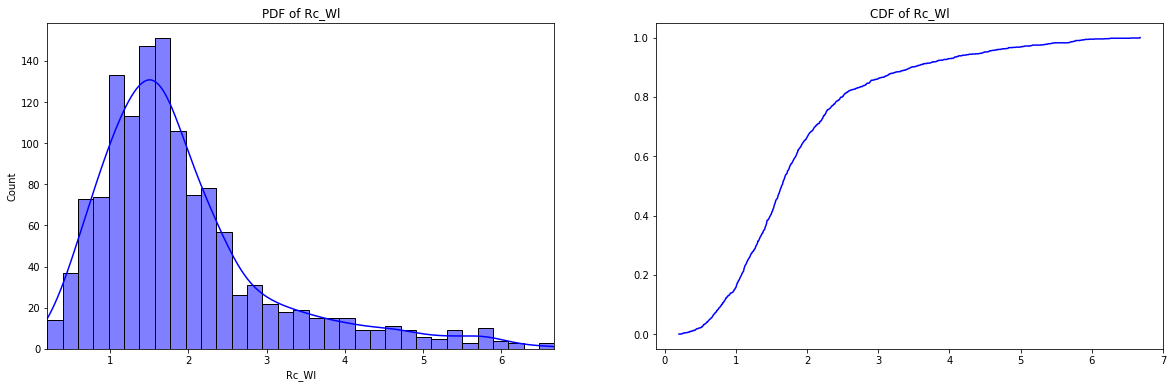

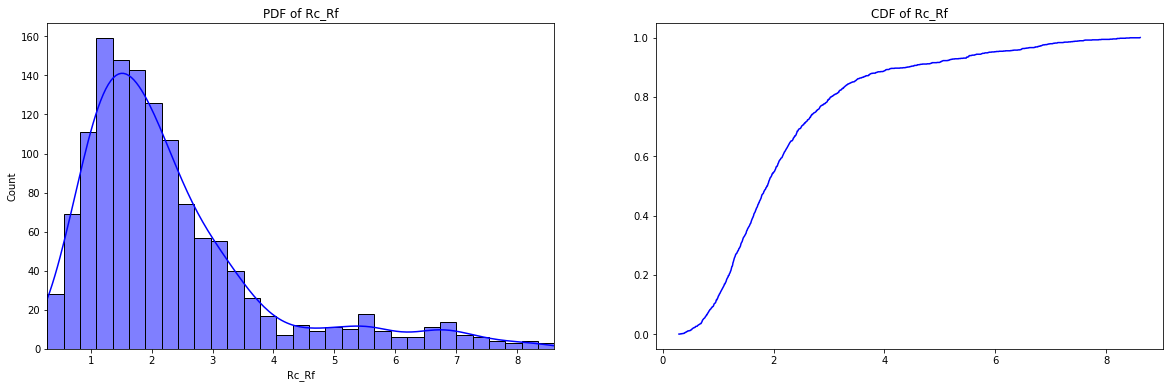

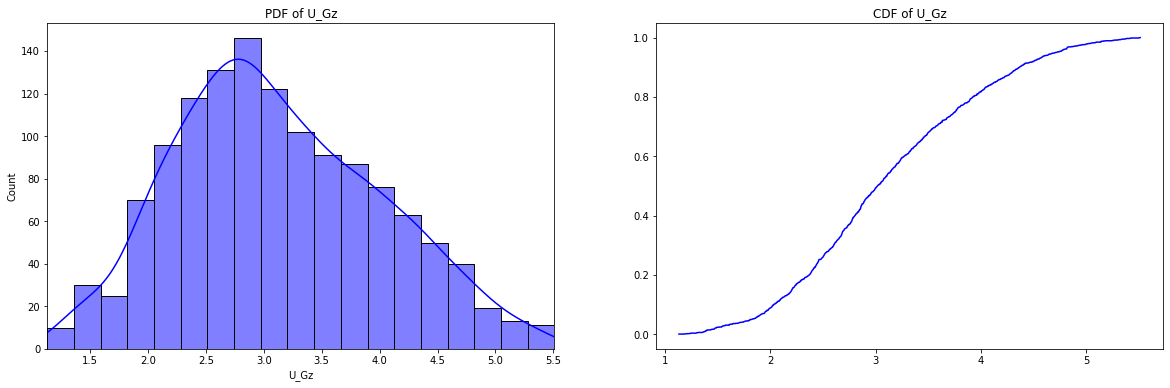

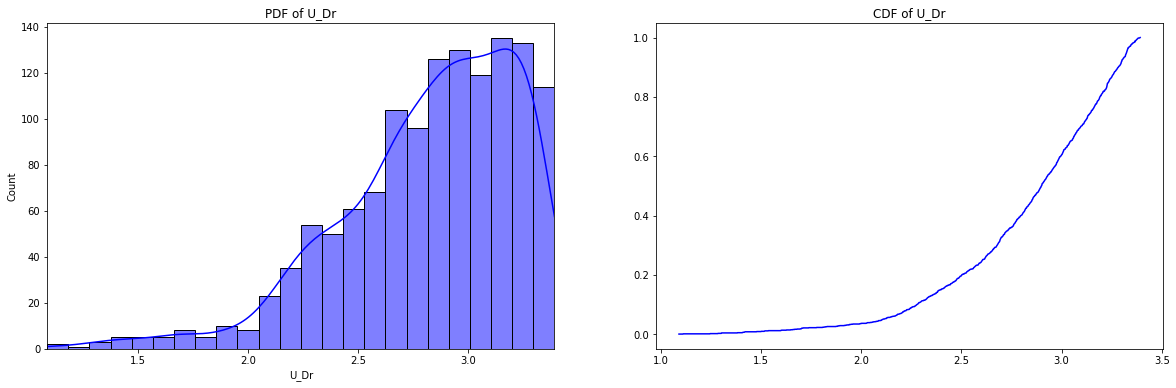

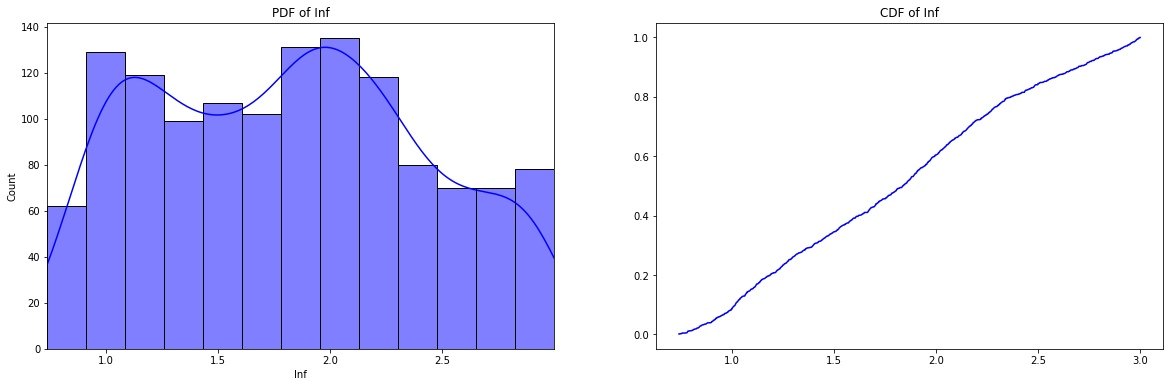

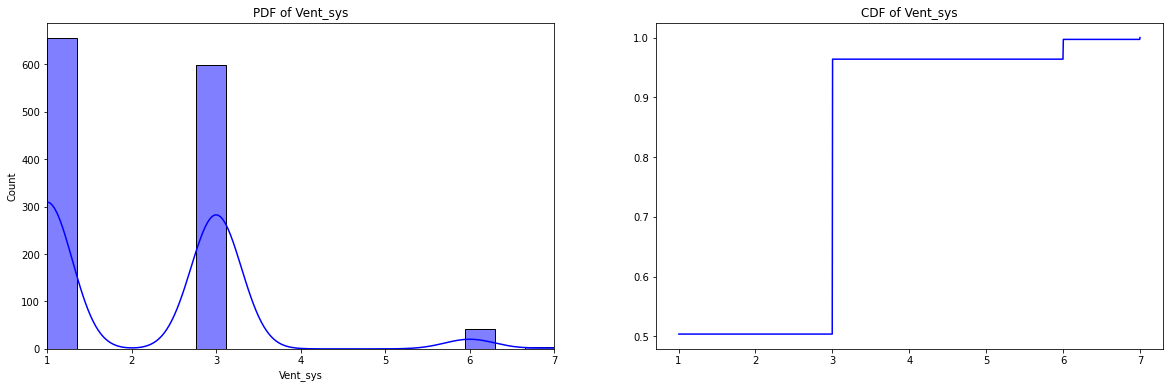

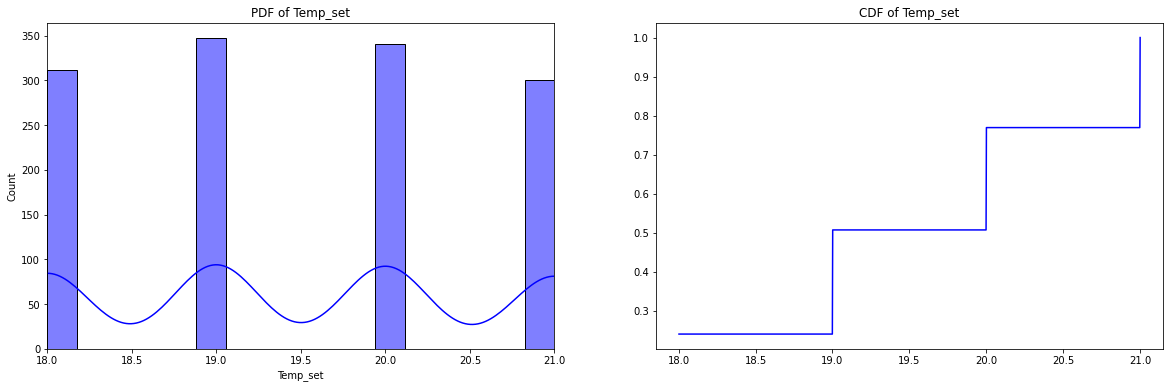

In [7]:
visualize_samples_and_plot_pdf_cdf(gen_sample)